# Welcome to Assignment 1 on course CV_CSL442_S21

## <span style='color:red'> ***Instructions:***</span>
#### <span style='color:red'>1. Use Python 3.x, jupyter notebook to run this notebook.</span>
#### <span style='color:red'>2. Write your code only in between the lines 'YOUR CODE STARTS HERE' and 'YOUR CODE ENDS HERE' you sould not change anything else code cells, if you do, the answers you are supposed to get at the end of this assignment might be wrong.</span>
#### <span style='color:red'>3. Read documentation of each function carefully.</span>
#### <span style='color:red'>4. Out of 7 questions we consider best 5 for the evaluation purpose.</span>
#### <span style='color:red'>5. Copying assignment solutions from others is strongly discouraged and will be considered as violation of academic code of conduct.</span>
#### <span style='color:red'>6. Early submitted assignment solutions will be considered for evaluation, so students please check your solutions carefully before submission.</span>
#### <span style='color:red'>7. Required two items for submission:</span>
    1. Solutions jupyter notebook file.
    2. Link to the recorded video of your program explanation and output demo. Try to keep the video duration minimum (preferably 10-15min).
#### <span style='color:red'>8. All the submissions should be submitted only in teams. Assignmnet due date is 15.2.2021 before 5:00PM. Late submission is accepted till 16.2.2021 before 5:00PM with 2 marks penalty from the accquired marks.</span>
#### <span style='color:blue'>***-:All the best:-***</span>

<span style='color:red'>1Q. Using basic image operations combine the scene and object images to get the composite image as shown below.</span>

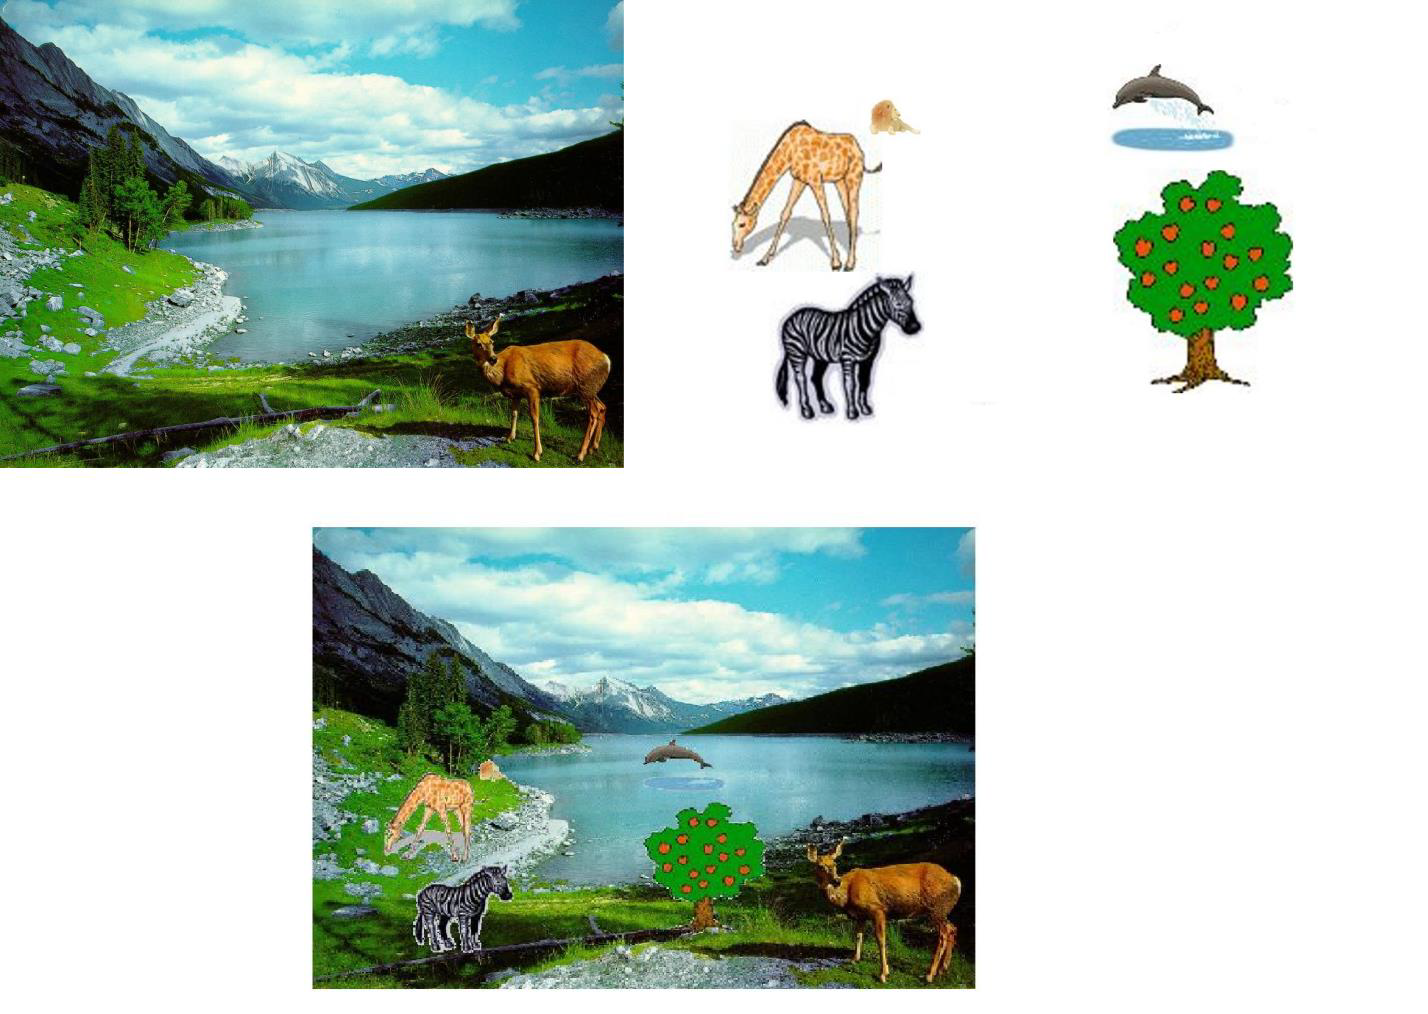

([], [])

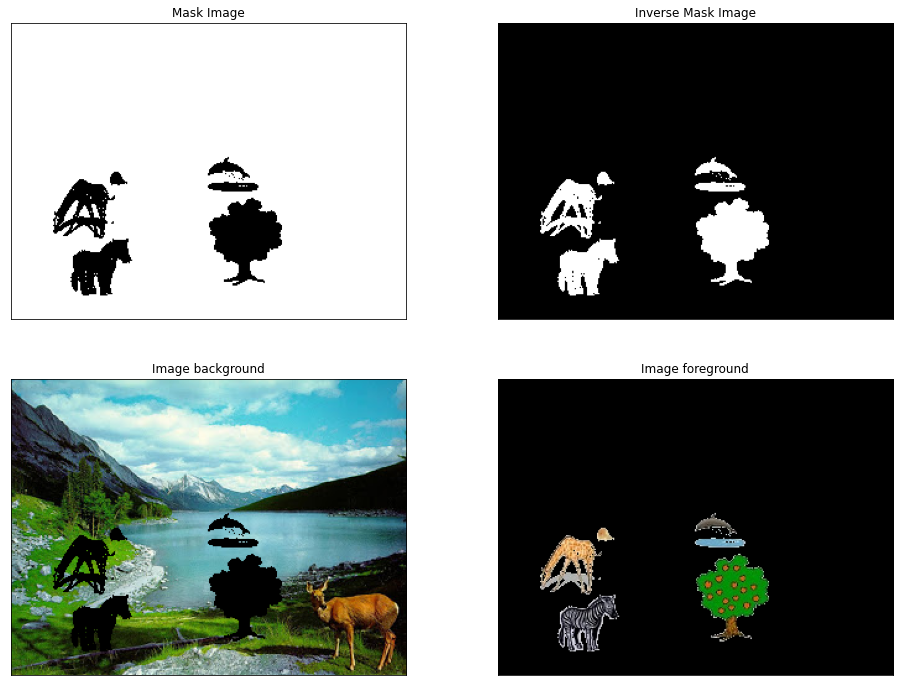

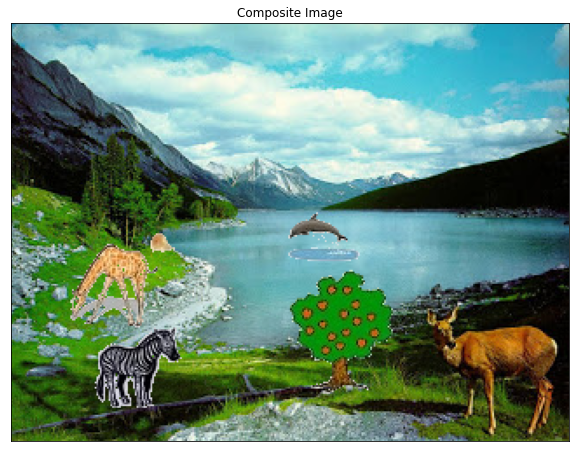

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


img1 = cv2.imread("img61.jpg")
img2 = cv2.imread("Sample_Image.jpg")

#YOUR CODE STARTS HERE

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray,225, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Zero background where we want to overlay
img_background = img1
img_background[mask_inv>0]=0 

img_foreground = img2
img_foreground[mask==255]=0

res_img = cv2.add(img_background,img_foreground)

#YOUR CODE ENDS HERE

mask=cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
mask_inv=cv2.cvtColor(mask_inv,cv2.COLOR_BGR2RGB)
img_background=cv2.cvtColor(img_background,cv2.COLOR_BGR2RGB)
img_foreground=cv2.cvtColor(img_foreground,cv2.COLOR_BGR2RGB)
res_img=cv2.cvtColor(res_img,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.imshow(mask)
plt.title('Mask Image')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,2)
plt.imshow(mask_inv)
plt.title('Inverse Mask Image')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,3)
plt.imshow(img_background)
plt.title('Image background')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,4)
plt.imshow(img_foreground)
plt.title('Image foreground')
plt.xticks([])
plt.yticks([])
plt.figure(figsize=(10,8))
plt.subplot(1,1,1)
plt.imshow(res_img)
plt.title('Composite Image')
plt.xticks([])
plt.yticks([])

<span style='color:red'>2Q. Implement a function domIntensity(im, k), which takes an image im and an integer k and returns a list of k most dominant intensities of that image. Experiment your code on any 3 images to validate the program output.</span>

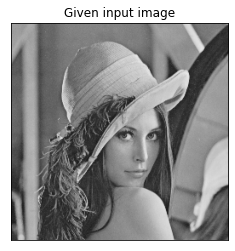

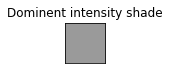

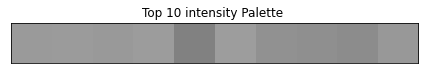

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def domIntensity(im, k):
    #YOUR CODE STARTS HERE
    
    # find frequency of pixels in range 0-255 
    bins = list(np.bincount(im.flatten()))
    #print(bins)
    x={}
    for i in range(0,len(bins)):
        x[i]=bins[i]
        
    sorted_dict = dict( sorted(x.items(),
                           key=lambda item: item[1],
                           reverse=True))
    y = list(sorted_dict.keys())
    sorted_intensities = []
    for i in range(0,len(y)):
        sorted_intensities.append(tuple((y[i],y[i],y[i])))
    
    #YOUR CODE ENDS HERE
    return sorted_intensities[:k]

def displayIntensityPalette(im, dom_list):
    plt.figure()
    if len(im.shape) == 2:
        plt.imshow(im, cmap = "gray")
    else:
        plt.imshow(im)
    plt.xticks([])
    plt.yticks([])
    plt.title("Given input image")
    k = len(dom_list)
    # Most dominant intensity
    top_im = np.array([[dom_list[0]]])
    plt.figure(figsize = (0.75,0.75), frameon=False)
    plt.imshow(top_im)
    plt.title('Dominent intensity shade')
    plt.xticks([])
    plt.yticks([])
    # k most dominant intensity palette
    plt.figure(figsize = ((0.75*k),0.75), frameon=False)
    dom_inty_im = np.array([[dom_list[i] for i in range(k)]])
    plt.imshow(dom_inty_im)
    plt.xticks([])
    plt.yticks([])
    plt.title("Top 10 intensity Palette ")

im = cv2.imread("lena_gray_256.jpg")
dom_list = domIntensity(im,10)
displayIntensityPalette(im, dom_list)

<span style='color:red'>3Q. Write a function <span style='color:blue'>histogramEqualization(image)</span> to stretch the image contrast. Using this function enhance the images histogram1.jpg, histogram2.jpg and histogram3.jpg and compare it with inbuilt function results. Record the observations.</span> 

<Figure size 1152x864 with 0 Axes>

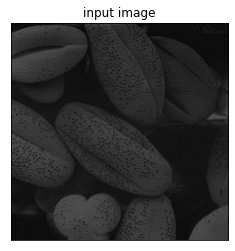

<Figure size 1152x864 with 0 Axes>

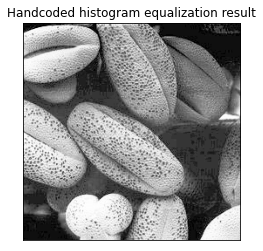

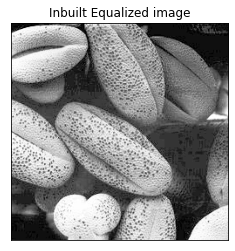

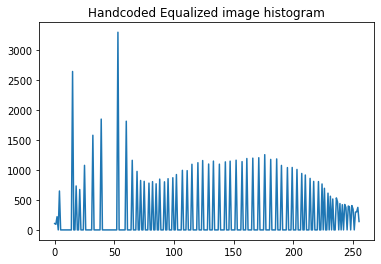

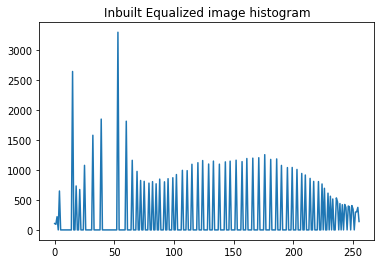

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

def plotHistogram(im):
    #YOUR CODE STARTS HERE

    imgHist = list(np.bincount(im.flatten()))

    #YOUR CODE ENDS HERE
    return imgHist

def histogramEqualization(im):
    #YOUR CODE STARTS HERE
    s = im.shape
    #calculate Histogram
    hist = np.bincount(im.flatten())
    pdf = hist/np.sum(hist)   #pdf
    cdf = np.cumsum(pdf)   #cumulative distribution function
    trans_func = np.round(cdf*(256-1))   #finding transfer function values
    
    im_new = np.zeros_like(im)
    # applying transfered values for each pixels
    for i in range(s[0]):
        for j in range(s[1]):
            k = im[i,j]
            im_new[i, j] = trans_func[k]
    #YOUR CODE ENDS HERE
    return im_new

he = cv2.imread('histogram3.jpg',0)
he1=cv2.cvtColor(he,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16,12))
plt.figure()
plt.title("input image")
plt.imshow(he1)
plt.xticks([])
plt.yticks([])

# Implemented
eq_img= histogramEqualization(he)
hist=plotHistogram(eq_img)
eq_img=cv2.cvtColor(eq_img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(16,12))
plt.figure()
plt.title("Handcoded histogram equalization result")
plt.imshow(eq_img)
plt.xticks([])
plt.yticks([])

#inbuilt
inbuilt_hist_img=cv2.equalizeHist(he)
inbuilt_hist = cv2.calcHist([eq_img], [0], None, [256], [0, 256])

plt.figure()
plt.title("Inbuilt Equalized image")
plt.imshow(inbuilt_hist_img, cmap = "gray")
plt.xticks([])
plt.yticks([])

plt.figure()
plt.title("Handcoded Equalized image histogram")
#plt.bar(range(256),hist)
plt.plot(hist)
plt.show()
plt.figure()
plt.title("Inbuilt Equalized image histogram")
plt.plot(inbuilt_hist)
plt.show()

<span style='color:red'>4Q.Images of outdoor scenes are often degraded by haze (due to fog, dust, etc). Light is attenuated by its passage through the atmosphere, and additional unwanted scattered light is added. We want to enhance the images to remove the effect of the haze. Look at input histograms of images “haze1.tif” and “haze2.tif”. Let’s assume that the pixels in the degraded image that have the lowest values (in each color band) actually should be pure black, and the pixels that have the highest values (in each color band) are actually should be pure white. A simple de-hazing algorithm is to take a color image, and for each band (red, green, blue), stretch its values to occupy the full range (0 to 255), such that 1% of data at the extreme ends is saturated at the low and high values (see Matlab’s “imadjust”). Then put the bands back together into an RGB image. Implement this algorithm and test it on the given images.</span>

<Figure size 1152x864 with 0 Axes>

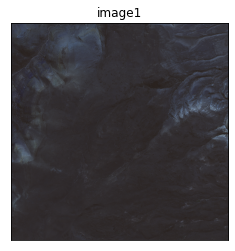

<Figure size 1152x864 with 0 Axes>

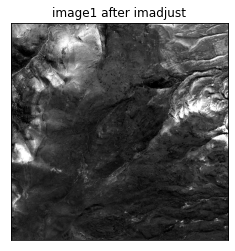

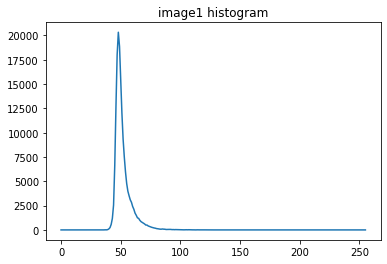

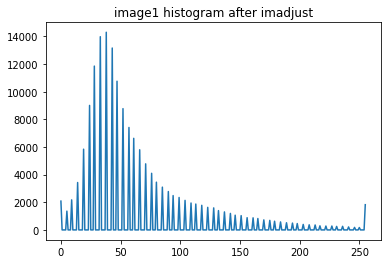

<Figure size 1152x864 with 0 Axes>

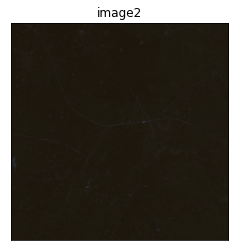

<Figure size 1152x864 with 0 Axes>

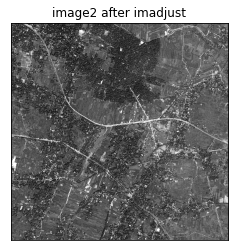

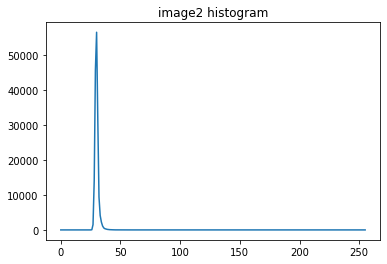

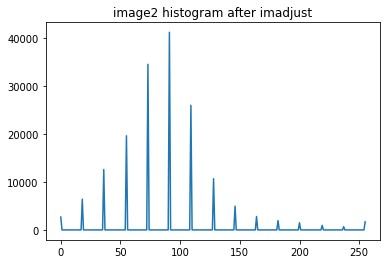

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# YOUR CODE STARTS HERE
import bisect

def imadjust1(src, vin=[0,255], vout=(0,255)):
    # src : input one-layer image (numpy array)
    # vin  : src image bounds
    # vout : dst image bounds
    # return : output img

    assert len(src.shape) == 2 ,'Input image should be 2-dims'

    # Compute in and out limits
    # Histogram
    hist = np.histogram(src,bins=list(range(256)),range=(0,255))[0]

    # Cumulative histogram
    cum = hist.copy()
    for i in range(1, len(hist)): cum[i] = cum[i - 1] + hist[i]

    # Compute bounds
    total = src.shape[0] * src.shape[1]
    low_bound = total * 1 / 100    # 1%
    upp_bound = total * (100 - 1) / 100
    #finding the bottom most 1& intensities
    vin[0] = bisect.bisect_left(cum, low_bound)
    vin[1] = bisect.bisect_left(cum, upp_bound)

    # Stretching
    scale = (vout[1] - vout[0]) / (vin[1] - vin[0])
    vs = src-vin[0]
    #top 1% lowest values are being made 0
    vs[src<vin[0]]=0
    #scaling
    vd = vs*scale+0.5 + vout[0]
    vd[vd>vout[1]] = vout[1]
    dst = vd

    return dst

img1 = cv2.imread('haze1.tif')
img2 = cv2.imread('haze2.tif')
img1ary = np.asarray(img1)
img2ary = np.asarray(img2)
img1arygray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img1arr = imadjust1(img1arygray)
img1arr = img1arr.astype(np.uint8)
img1arr = cv2.cvtColor(img1arr,cv2.COLOR_GRAY2BGR)
hist1 = cv2.calcHist([img1], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([img1arr], [0], None, [256], [0, 256])
img2arygray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
img2arr = imadjust1(img2arygray)
img2arr = img2arr.astype(np.uint8)
img2arr = cv2.cvtColor(img2arr,cv2.COLOR_GRAY2BGR)
hist1_ = cv2.calcHist([img2], [0], None, [256], [0, 256])
hist2_ = cv2.calcHist([img2arr], [0], None, [256], [0, 256])

plt.figure(figsize=(16,12))
plt.figure()
plt.title("image1")
plt.imshow(img1)
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.figure()
plt.title("image1 after imadjust")
plt.imshow(img1arr)
plt.xticks([])
plt.yticks([])

plt.figure()
plt.title("image1 histogram")
plt.plot(hist1)
plt.show()
    
plt.figure()
plt.title("image1 histogram after imadjust")
plt.plot(hist2)
plt.show()
    
plt.figure(figsize=(16,12))
plt.figure()
plt.title("image2")
plt.imshow(img2)
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.figure()
plt.title("image2 after imadjust")
plt.imshow(img2arr)
plt.xticks([])
plt.yticks([])

plt.figure()
plt.title("image2 histogram")
plt.plot(hist1_)
plt.show()
    
plt.figure()
plt.title("image2 histogram after imadjust")
plt.plot(hist2_)
plt.show() 
    
    

    
    
# YOUR CODE ENDS HERE

<span style='color:red'>5Q. Try to enhance the ‘skeleton.jpg’ image by performing the sequence of operations given as comments in the program. make note of the observations in each step. </span>
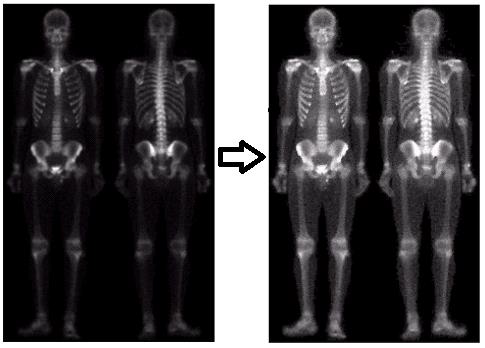

([], [])

<Figure size 1152x864 with 0 Axes>

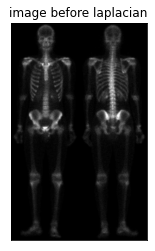

<Figure size 1152x864 with 0 Axes>

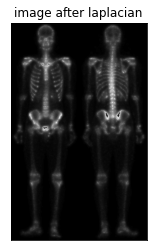

<Figure size 1152x864 with 0 Axes>

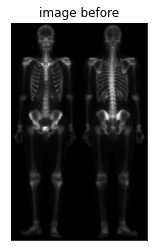

<Figure size 1152x864 with 0 Axes>

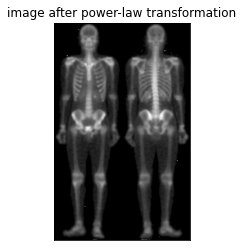

In [9]:
# Question 5: Sequence of steps to enhance the image.

#1. (a).read image of whole body bone scan.
#2. (b) Laplacian of (a).
#3. (c) Sharpened image obtained by adding (a) and (b).
#4. (d) Sobel gradient of image (a).
#5. (e) Sobel image smoothed with a 5 × 5 box filter.
#6. (f) Mask image formed by the product of (b) and (e).
#7. (g) Sharpened image obtained by the adding images (a) and (f).
#8. (h) Final result obtained by applying a power-law transformation to (g).

#YOUR CODE STARTS HERE
scale = 1
delta = 0
ddepth = cv2.CV_16S
kernel_size = 3

#1. (a).read image of whole body bone scan.
src = cv2.imread('skeleton.tif', cv2.IMREAD_COLOR) # Load an image
# Convert the image to grayscale
im2 = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
src_gray = cv2.blur(im2,(5,5))

#2. (b) Laplacian of (a).
# Apply Laplace function
dst = cv2.Laplacian(src_gray, ddepth, ksize=kernel_size)
# converting back to uint8
abs_dst = cv2.convertScaleAbs(dst)

#3. (c) Sharpened image obtained by adding (a) and (b).
img = src_gray + abs_dst 
img_laplacian = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
plt.figure(figsize=(16,12))
plt.figure()
plt.title("image before laplacian")
plt.imshow(src)
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.figure()
plt.title("image after laplacian")
plt.imshow(img_laplacian)
plt.xticks([])
plt.yticks([])

#4. (d) Sobel gradient of image (a).
gray = src_gray
# Gradient-X
grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=9, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
# Gradient-Y
grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=9, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
#grad = np.float32(np.sqrt(np.square(abs_grad_x) + np.square(abs_grad_y)))

#5. (e) Sobel image smoothed with a 5 × 5 box filter.
kernel = np.ones((5,5),np.float32)/25
#img_smooth = cv2.filter2D(grad,-1,kernel)
img_smooth = cv2.medianBlur(grad,5)
#averaging 
#img_smooth = cv2.blur(grad,(5,5))
img_sobel = cv2.cvtColor(img_smooth, cv2.COLOR_GRAY2BGR)

#6. (f) Mask image formed by the product of (b) and (e).
mask_img = cv2.multiply(img,img_smooth)

#7. (g) Sharpened image obtained by the adding images (a) and (f).
img_g = src_gray + mask_img

#8. (h) Final result obtained by applying a power-law transformation to (g).
      
# Apply gamma correction.
gamma = 0.5
gamma_corrected = np.array(255*(img_g / 255) ** gamma, dtype = 'uint8')
img_gsmooth = cv2.medianBlur(gamma_corrected,5)
img_gamma = cv2.cvtColor(img_gsmooth, cv2.COLOR_GRAY2BGR)
    
plt.figure(figsize=(16,12))
plt.figure()
plt.title("image before")
plt.imshow(src)
plt.xticks([])
plt.yticks([])
    
plt.figure(figsize=(16,12))
plt.figure()
plt.title("image after power-law transformation")
plt.imshow(img_gamma)
plt.xticks([])
plt.yticks([])
    





#YOUR CODE ENDS HERE

<span style='color:red'>6Q. Write a program to find the largest correlation spot in the given image (hills.jpg) using linear filtering based template matching technique. Draw rectangular bounding box at the detected template (template.png) matched locations.</span>

0.9482604488423959
(137, 0)
(221, 126)


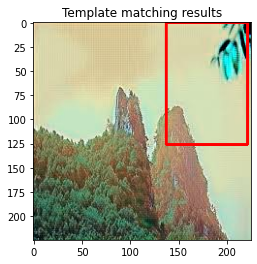

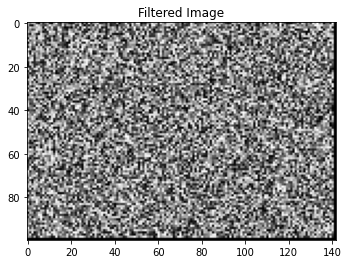

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Implement Linear Filtering technique on an image using a linear filter #correlation
def linear_filter(image, filter_): # 'filter' is a keyword in python, so is the underscore at the end.
    """
    Performs linear filtering on an image.
    Assume image size is W1xW2, filter size is F1xF2.
    
    Arguments:
    image -- input image possibly with 3 channels(RGB).
    filter_ -- linear filter to apply on image.
    
    Returns:
    result -- filtered image. 
    """
    # DO NOT CHAGE THIS CODE   
    src = image
    image = np.array(cv2.cvtColor(image,cv2.COLOR_BGR2GRAY))
    image_height, image_width = image.shape[0], image.shape[1]

    #filter_ = np.array(filter_.convert('L')) 
    filter_ = np.array(cv2.cvtColor(filter_,cv2.COLOR_BGR2GRAY))
    filter_height, filter_width = filter_.shape[0], filter_.shape[1]
   
    # result shape will be of size --> (((W1−F1+2P) / S) + 1) x (((W2−F2+2P) / S) + 1), where 'P' is padding length
    # S is stride length, if you don't know about them, don't worry, you will learn in upcoming lectures.For now
    # we will use simplest setting P=0,S=1. See the next line.

    result_height, result_width = (image_height - filter_height) + 1, (image_width - filter_width) + 1
    result = np.array([[0 for j in range(result_width)] for i in range(result_height)])
    
    # YOUR CODE STARTS HERE
    filtered_image = result
    h = int(filter_height/2)
    w = int(filter_width/2)
    max_match = 0.0
    color = (255, 0, 0) 
    
    # Line thickness of 2 px 
    thickness = 2
    for i in range(h, image_height-h):
        for j in range(w, image_width-w):
            k = image[i-h:i+h,j-w:j+w]  
            k = k.astype('float')
            l = np.sum(np.multiply(k,filter_))
            l = l.astype('float')
            mag = float(np.linalg.norm(k)*np.linalg.norm(filter_))
            res = float(l/mag)
            if res> max_match:
                max_match = res
                start_point = (j-w, i-h)
                end_point = (j+w, i+h)
            filtered_image[i-h, j-w] = l
    
    print(max_match)
    print(start_point)
    print(end_point)
    filtered_image = filtered_image.astype(np.uint8)
    filtered_image = cv2.cvtColor(filtered_image,cv2.COLOR_GRAY2BGR)
    image = image.astype(np.uint8)
    image = cv2.cvtColor(image,cv2.COLOR_GRAY2BGR)
    image = cv2.rectangle(src, start_point, end_point, color, thickness) 
    plt.imshow(image)
    plt.title('Template matching results')
    plt.show()
    
    
    
    # YOUR CODE ENDS HERE
    return filtered_image



# To test your implementation, run the below code.
image = cv2.imread('hills.jpeg')
filter_ = cv2.imread('template.png')
result = linear_filter(image, filter_)

plt.imshow(result)
plt.title('Filtered Image')
plt.show()

<span style='color:red'>7Q. Write functions/subroutines to design spatial filters (sizes of 3X3 and 5X5) - mean, median, Min-Max. For the given noise images. Apply the appropriate filter to enhance the image quality. use images Cameraman_SandP_0.08.jpg, Camerman_G_0.05.jpg. Make observations upon comparing their outputs.</span> 

([], [])

<Figure size 1152x864 with 0 Axes>

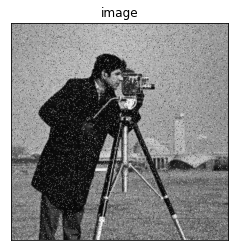

<Figure size 1152x864 with 0 Axes>

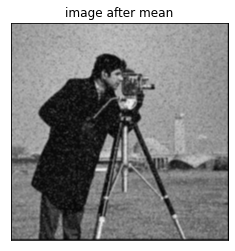

<Figure size 1152x864 with 0 Axes>

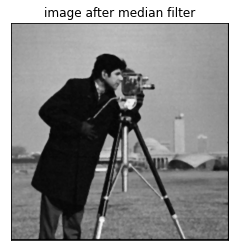

<Figure size 1152x864 with 0 Axes>

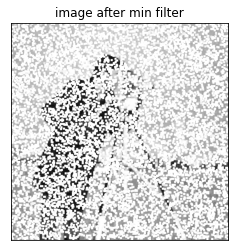

<Figure size 1152x864 with 0 Axes>

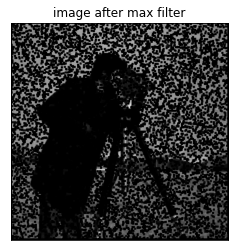

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

#YOUR CODE STARTS HERE
def meanFilter(im, size):
    # Obtain number of rows and columns  
    # of the image 
    img1 = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    m, n = img1.shape 

    # Develop Averaging filter(3, 3) mask 
    mask = np.ones([size, size], dtype = int) 
    mask = mask / (size*size)

    #Form new padded matrix
    new_m = m+size-1
    new_n = n+size-1
    img_new = np.zeros([new_m, new_n]) 
    img_new1 = np.zeros([m, n]) 
    
    if size==3:
        for i in range(1, m): 
            for j in range(1, n): 
                img_new[i, j] = img1[i-1, j-1]
                
        img = img_new
        # Convolve the 3X3 mask over the image  
        for i in range(1, new_m-1): 
            for j in range(1, new_n-1): 
                k = img[i-1:i+2,j-1:j+2]
                l = np.sum(np.multiply(k,mask))
                img_new1[i-1, j-1]= l  

    if size==5:
        for i in range(2, m): 
            for j in range(2, n): 
                img_new[i, j] = img1[i-2, j-2]
                
        img = img_new
        # Convolve the 5X5 mask over the image
        for i in range(2, new_m-2): 
            for j in range(2, new_n-2): 
                k = img[i-2:i+3,j-2:j+3]
                l = np.sum(np.multiply(k,mask))
                img_new1[i-2, j-2]= l 
    
    img_new1 = img_new1.astype(np.uint8)

    im_new = cv2.cvtColor(img_new1,cv2.COLOR_GRAY2BGR)
    return im_new

def medianFilter(im, size):
    img1 = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    # Obtain the number of rows and columns  
    # of the image 
    m, n = img1.shape 
    
    # Traverse the image. For every 3X3 area,  
    # find the median of the pixels and 
    # replace the ceter pixel by the median
    # Form new padded matrix
    new_m, new_n = m+size-1, n+size-1
    img_new = np.zeros([m+size-1, n+size-1]) 
    img_new1 = np.zeros([m, n]) 
            
    if size==3:
        for i in range(1, m): 
            for j in range(1, n): 
                img_new[i, j] = img1[i-1, j-1]

        img = img_new
        for i in range(1, new_m-1): 
            for j in range(1, new_n-1): 

                k = img[i-1:i+2,j-1:j+2]
                l = np.median(k)
                img_new1[i-1, j-1]= l

    if size==5:
        for i in range(2, m): 
            for j in range(2, n): 
                img_new[i, j] = img1[i-2, j-2]
         
        img = img_new
        for i in range(2, new_m-2): 
            for j in range(2, new_n-2): 

                k = img[i-2:i+3,j-2:j+3]
                l = np.median(k)
                img_new1[i-2, j-2]= l

    img_new1 = img_new1.astype(np.uint8)
    im_new = cv2.cvtColor(img_new1,cv2.COLOR_GRAY2BGR)
    return im_new

def minFilter(im, size):
    img1 = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    # Obtain the number of rows and columns  
    # of the image 
    m, n = img1.shape 
    
    # Traverse the image. For every 3X3 area,  
    # find the median of the pixels and 
    # replace the ceter pixel by the median
    # Form new padded matrix
    new_m, new_n = m+size-1, n+size-1
    img_new = np.zeros([m+size-1, n+size-1]) 
    img_new1 = np.zeros([m, n]) 
            
    if size==3:
        for i in range(1, m): 
            for j in range(1, n): 
                img_new[i, j] = img1[i-1, j-1]
            
        img = img_new
        for i in range(1, new_m-1): 
            for j in range(1, new_n-1): 
                k = img[i-1:i+2,j-1:j+2]
                l = np.max(k)
                img_new1[i-1, j-1]= l
                
    if size==5:
        for i in range(2, m): 
            for j in range(2, n): 
                img_new[i, j] = img1[i-2, j-2]
        img = img_new
        for i in range(2, new_m-2): 
            for j in range(2, new_n-2): 
                k = img[i-2:i+3,j-2:j+3]
                l = np.max(k)
                img_new1[i-2, j-2]= l

    img_new1 = img_new1.astype(np.uint8)
    im_new = cv2.cvtColor(img_new1,cv2.COLOR_GRAY2BGR)
    return im_new

def maxFilter(im, size):
    img1 = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    # Obtain the number of rows and columns  
    # of the image 
    m, n = img1.shape 

    # Traverse the image. For every 3X3 area,  
    # find the median of the pixels and 
    # replace the ceter pixel by the median
    # Form new padded matrix
    new_m, new_n = m+size-1, n+size-1
    img_new = np.zeros([m+size-1, n+size-1]) 
    img_new1 = np.zeros([m, n]) 
            
    if size==3:
        for i in range(1, m): 
            for j in range(1, n): 
                img_new[i, j] = img1[i-1, j-1]
            
        img = img_new
        for i in range(1, new_m-1): 
            for j in range(1, new_n-1): 
                k = img[i-1:i+2,j-1:j+2]
                l = np.min(k)
                img_new1[i-1, j-1]= l
    if size==5:
        for i in range(2, m): 
            for j in range(2, n): 
                img_new[i, j] = img1[i-2, j-2]
        img = img_new    
        for i in range(2, new_m-2): 
            for j in range(2, new_n-2): 
                k = img[i-2:i+3,j-2:j+3]
                l = np.min(k)
                img_new1[i-2, j-2]= l
                
    img_new1 = img_new1.astype(np.uint8)
    im_new = cv2.cvtColor(img_new1,cv2.COLOR_GRAY2BGR)
    return im_new

img = cv2.imread('Cameraman_SandP_0.08.jpg')
size = 5
im1 = meanFilter(img, size)
im2 = medianFilter(img, size)
im3 = minFilter(img, size)
im4 = maxFilter(img, size)

plt.figure(figsize=(16,12))
plt.figure()
plt.title("image")
plt.imshow(img)
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.figure()
plt.title("image after mean")
plt.imshow(im1)
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.figure()
plt.title("image after median filter")
plt.imshow(im2)
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.figure()
plt.title("image after min filter")
plt.imshow(im3)
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.figure()
plt.title("image after max filter")
plt.imshow(im4)
plt.xticks([])
plt.yticks([])

#YOUR CODE ENDS HERE